In [3]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

import seaborn as sns

In [4]:
data = pd.read_csv("credit-risk-dataset.csv")
data["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [5]:
data.duplicated().sum()

np.int64(165)

In [6]:
predictors = ["person_age", "person_emp_length", "cb_person_default_on_file", "loan_status"]
data = data[predictors]

In [7]:
response_variables = ["loan_status"]
data[response_variables].value_counts(normalize=True)

loan_status
0              0.781836
1              0.218164
Name: proportion, dtype: float64

In [8]:
y = data[response_variables]
X = data.drop(columns=response_variables, axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [10]:
y_test.value_counts(normalize=True)

loan_status
0              0.78179
1              0.21821
Name: proportion, dtype: float64

In [11]:
data_train = pd.concat([X_train, y_train], axis=1)

# validata data_train
print(f"Shape {data_train.shape}")
data_train.head()

Shape (22806, 4)


,person_age,person_emp_length,cb_person_default_on_file,loan_status
11491,26,1.0,N,0
3890,23,3.0,N,0
17344,24,1.0,N,1
13023,24,1.0,N,0
29565,42,4.0,N,1


In [12]:
data_train.isna().sum()

person_age                     0
person_emp_length            639
cb_person_default_on_file      0
loan_status                    0
dtype: int64

In [13]:
# Predictor : Person Age
data_train["person_age"].describe()

count    22806.000000
mean        27.722880
std          6.336638
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

<Axes: xlabel='person_age', ylabel='Count'>

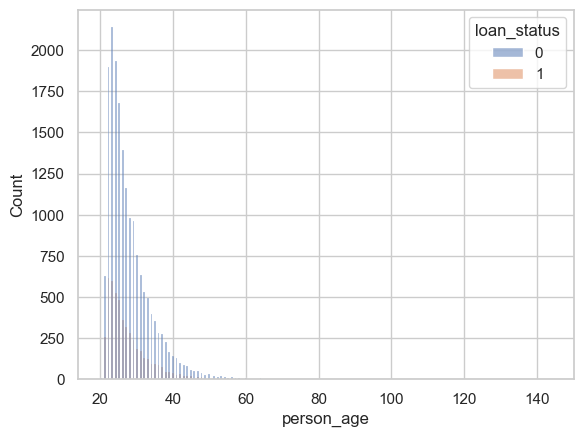

In [14]:
seaborn.set_theme(style="whitegrid")
sns.histplot(data=data_train, x="person_age", hue="loan_status")

In [15]:
data_train["person_age"].groupby(data_train["loan_status"]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17831.0,27.784981,6.337859,20.0,23.0,26.0,30.0,144.0
1,4975.0,27.500302,6.327888,20.0,23.0,26.0,30.0,70.0


<Axes: xlabel='loan_status', ylabel='person_age'>

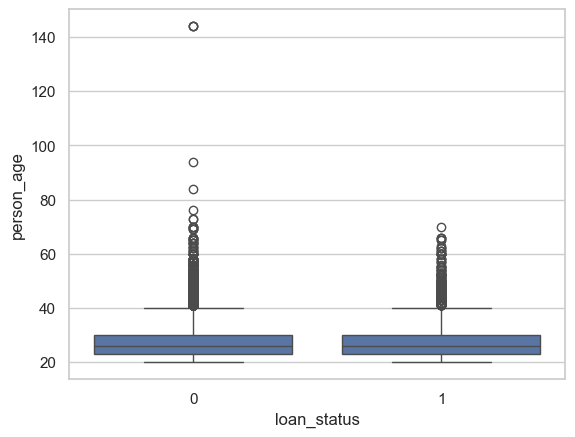

In [16]:
sns.boxplot(data=data_train, x="loan_status", y="person_age")

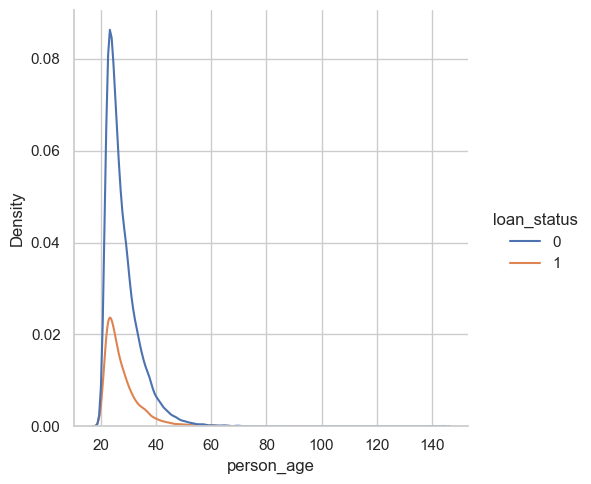

In [17]:
sns.displot(data=data_train, x="person_age", hue="loan_status", kind="kde")

In [18]:
# Calculate Q1 and Q3
Q1_person_age = np.percentile(data_train["person_age"], 25)
Q3_person_age = np.percentile(data_train["person_age"], 75)

# Calculate IQR
IQR_person_age = Q3_person_age - Q1_person_age

# Calculate Threshold
min_person_age = Q1_person_age - (1.5*IQR_person_age)
max_person_age = Q3_person_age + (1.5*IQR_person_age)

In [19]:
print(min_person_age, max_person_age)

12.5 40.5


In [21]:
adj_min_person_age = 21
adj_max_person_age = 55

In [20]:
# Predictor person_emp_length

Index(['person_age', 'person_emp_length', 'cb_person_default_on_file',
       'loan_status'],
      dtype='object')

In [24]:
data_train["person_emp_length"].describe()

count    22167.000000
mean         4.796905
std          4.120061
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [26]:
data_train["person_emp_length"].groupby(data_train["loan_status"]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17388.0,4.978951,4.161727,0.0,2.0,4.0,7.0,123.0
1,4779.0,4.134547,3.894015,0.0,1.0,3.0,6.0,34.0


<Axes: xlabel='loan_status', ylabel='person_emp_length'>

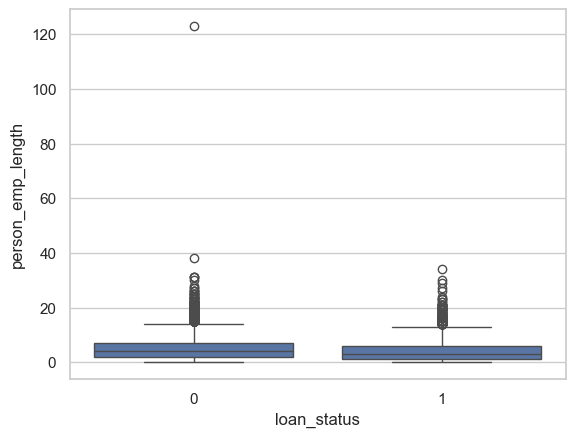

In [28]:
sns.boxplot(data=data_train, x="loan_status", y="person_emp_length")

In [32]:
# Check data Integrity
underage_worker = (data_train["person_age"] - data_train["person_emp_length"]) < 18
data_train[underage_worker]

,person_age,person_emp_length,cb_person_default_on_file,loan_status
25029,27,11.0,N,0
179,24,8.0,N,0
11278,25,9.0,N,0
13547,22,6.0,N,0
17324,23,7.0,N,1
...,...,...,...,...
13675,26,10.0,N,0
14989,24,8.0,N,0
10023,23,7.0,N,0
1663,22,7.0,N,0


In [ ]:
# Predictor cb_person_default_on_file

In [35]:
data_train["cb_person_default_on_file"].value_counts(normalize=True)

count     22806
unique        2
top           N
freq      18758
Name: cb_person_default_on_file, dtype: object

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

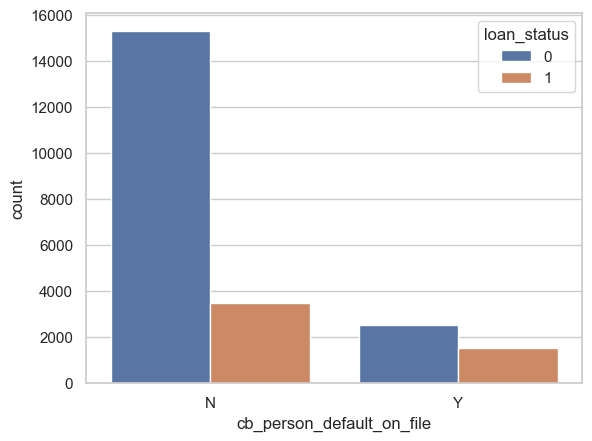

In [36]:
sns.countplot(
    data=data_train, x="cb_person_default_on_file", hue="loan_status"
)

In [38]:
default_by_history = pd.crosstab(
    data_train["cb_person_default_on_file"],
    data_train["loan_status"],
    margins=False,
)
default_by_history

loan_status,0,1
cb_person_default_on_file,,
N,15302,3456
Y,2529,1519


In [43]:
# Odds of default from those who never default
odds_never_default = default_by_history[1][0]/default_by_history[0][0]

# Odds of default from those who have been default
odds_ever_default = default_by_history[1][1]/default_by_history[0][1]

/var/folders/zk/brzgnbks3bb5n5z8_bd3rvrm0000gn/T/ipykernel_6147/4144257875.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  odds_never_default = default_by_history[1][0]/default_by_history[0][0]
/var/folders/zk/brzgnbks3bb5n5z8_bd3rvrm0000gn/T/ipykernel_6147/4144257875.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  odds_ever_default = default_by_history[1][1]/default_by_history[0][1]


In [50]:
import scipy.stats as stats
from scipy.stats import chi2_contingency, alpha

# Test whether default history is independent of default_loan_status
stats.chi2_contingency(default_by_history)
results = stats.chi2_contingency(default_by_history)

stats = results[0]
pval = results[1]

print(f"Chi stats : {stats}")
print(f"p-value : {pval}")

alpha = 0.05

if pval < alpha:
    print(f"Default and {predictors} is not independent with P-val={pval}")
else:
    print(f"Default and {predictors} is independent with P-val={pval}")

Chi stats : 711.0769535492474
p-value : 1.1667412941768867e-156
Default and ['person_age', 'person_emp_length', 'cb_person_default_on_file', 'loan_status'] is not independent with P-val=1.1667412941768867e-156


In [ ]:
# Create a function of independence test
def independence_test(data, predictor_label, alpha=0.05):
    """
    Funtion to perform the independence test.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[predictor_label],
                           data["loan_status"],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Default and {predictor_label} is not independent with P-val={pval}.")
    else:
        print(f"Default and {predictor_label} is independent with P-val={pval}.")

In [52]:
# Binning

def create_binning(data, predictor_label, num_of_bins):
    data = data.copy()

    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label], q=num_of_bins)
    return data

In [55]:
data_train_binned = create_binning(data_train, "person_age", num_of_bins=4)
data_train_binned

,person_age,person_emp_length,cb_person_default_on_file,loan_status,person_age_bin
11491,26,1.0,N,0,"(23.0, 26.0]"
3890,23,3.0,N,0,"(19.999, 23.0]"
17344,24,1.0,N,1,"(23.0, 26.0]"
13023,24,1.0,N,0,"(23.0, 26.0]"
29565,42,4.0,N,1,"(30.0, 144.0]"
...,...,...,...,...,...
22095,32,3.0,N,0,"(30.0, 144.0]"
18736,30,0.0,N,0,"(26.0, 30.0]"
1663,22,7.0,N,0,"(19.999, 23.0]"
18257,29,4.0,Y,0,"(26.0, 30.0]"


In [56]:
data_train_binned["person_age_bin"].value_counts()

person_age_bin
(23.0, 26.0]      6368
(19.999, 23.0]    6140
(30.0, 144.0]     5416
(26.0, 30.0]      4882
Name: count, dtype: int64

,person_age,person_emp_length,cb_person_default_on_file,loan_status,person_age_bin
11491,26,1.0,N,0,"(23.0, 26.0]"
3890,23,3.0,N,0,"(19.999, 23.0]"
17344,24,1.0,N,1,"(23.0, 26.0]"
13023,24,1.0,N,0,"(23.0, 26.0]"
29565,42,4.0,N,1,"(30.0, 144.0]"
...,...,...,...,...,...
22095,32,3.0,N,0,"(30.0, 144.0]"
18736,30,0.0,N,0,"(26.0, 30.0]"
1663,22,7.0,N,0,"(19.999, 23.0]"
18257,29,4.0,Y,0,"(26.0, 30.0]"
